**PCA**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
num_features = len(iris.feature_names)
num_features

4

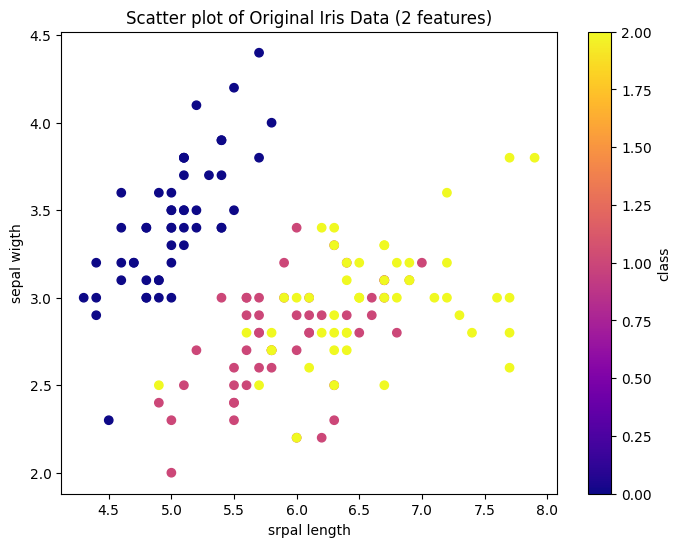

In [ ]:
#พล็อตกราฟแบบ Scatter ของข้อมูล load_iris() โดยเลือกมิติ(Feature) มา 2 ตัว แทนในแกน x และ y
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma') #เปลี่ยนตัวแปร
plt.xlabel('srpal length')  #เปลี่ยนชื่อด้วย
plt.ylabel('sepal wigth')  #เปลี่ยนชื่อด้วย
plt.title('Scatter plot of Original Iris Data (2 features)') #เปลี่ยนชื่อด้วย
plt.colorbar(label='class')
plt.show()

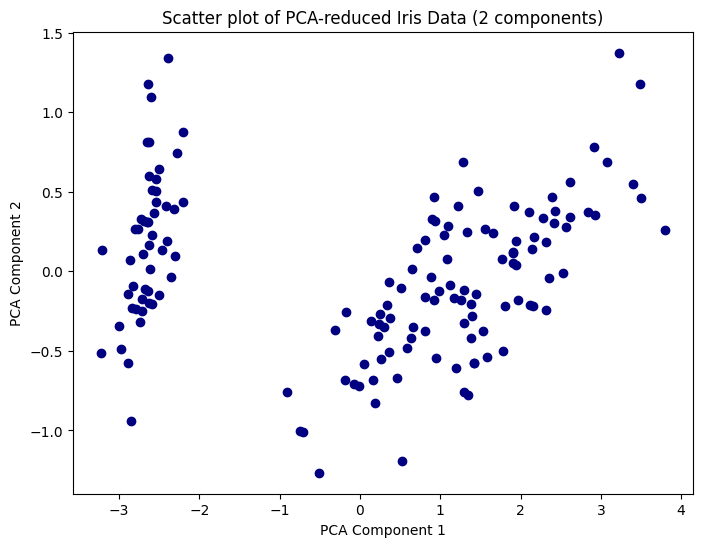

In [ ]:
#ใช้ PCA ในการลดขนาดข้อมูลลงจนเหลือ 2 มิติ (n_component = 2)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= 'navy')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter plot of PCA-reduced Iris Data (2 components)')
plt.show()

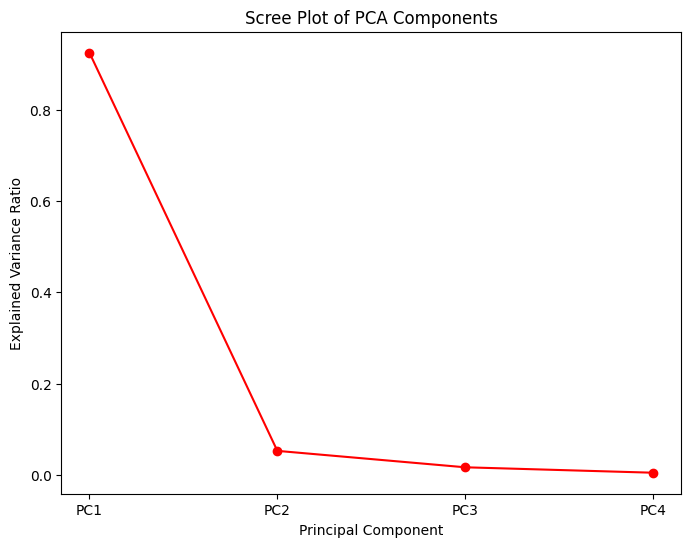

In [ ]:
#พล็อตกราฟ Scree Plot ของ PC1, PC2, PC3, PC4
import numpy as np
pca = PCA()
pca.fit(iris.data)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 5), explained_variance_ratio, marker='o', linestyle='-', c='red')  #1-5เพราะมี4คอลัมน์
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA Components')
plt.xticks(np.arange(1, 5), ['PC1', 'PC2', 'PC3', 'PC4'])
plt.show()

In [ ]:
#ข้อ 2 เลือกชุดข้อมูลเอง
import pandas as pd
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
feature_names = wine.feature_names
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
num_features = len(wine.feature_names)
num_features

13

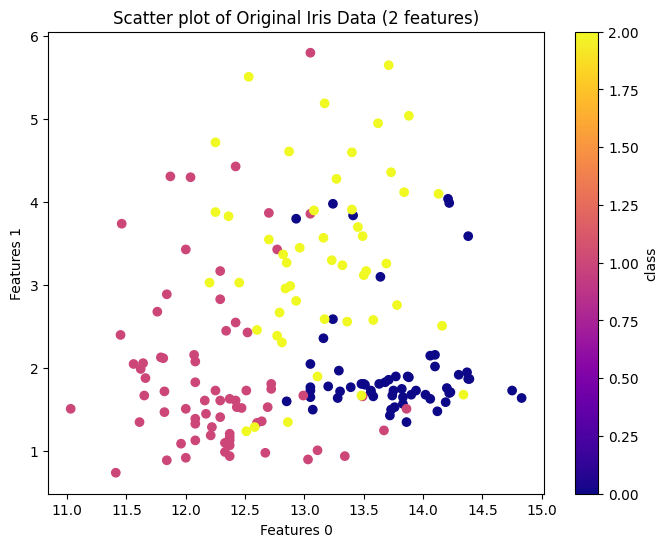

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.xlabel('Features 0')
plt.ylabel('Features 1')
plt.title('Scatter plot of Original Iris Data (2 features)')
plt.colorbar(label='class')
plt.show()

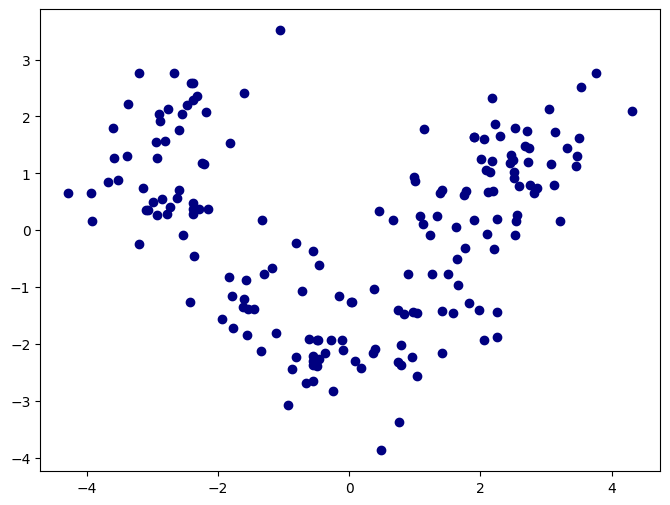

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= 'navy')
plt.show()

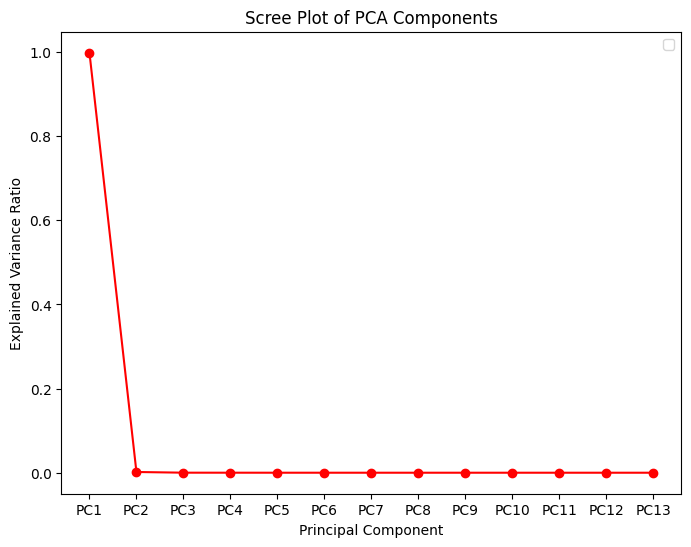

In [ ]:
import numpy as np
pca = PCA()
pca.fit(wine.data)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 14), explained_variance_ratio,marker='o',linestyle='-', c='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA Components')
plt.xticks(range(1, 14), ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7',
'PC8','PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
plt.legend()
plt.show()

**Proximity**

In [ ]:
import numpy

In [ ]:
#อัพไฟล์ w  x  y z
w = numpy.load("w.npy")
x = numpy.load("x.npy")
y = numpy.load("y.npy")
z = numpy.load("z.npy")

In [ ]:
# W จำนวน Attribute
len(w)

50

In [ ]:
np.unique(w)

array([0, 1], dtype=int32)

In [ ]:
# W หาจำนวนเลข 1
sum(w)

30

In [ ]:
# W หาจำนวนเลข 0
len(w)-sum(w)

20

In [ ]:
# X จำนวน Attribute
len(x)

In [ ]:
np.unique(x)

In [ ]:
# X หาจำนวนเลข 1
sum(x)

In [ ]:
# X หาจำนวนเลข 0
len(x)-sum(x)

In [ ]:
# Z จำนวน Attribute
len(z)

In [ ]:
np.unique(z)

In [ ]:
# Z หาจำนวนเลข 1
sum(z)

In [ ]:
# Z หาจำนวนเลข 0
len(z)-sum(z)

In [ ]:
#ส่วนที่ 2 contingency
import pandas as pd

In [ ]:
contingency_table = pd.crosstab(w, x)
print(contingency_table)


col_0   0   1
row_0        
0      11   9
1      16  14


In [ ]:
contingency_table = pd.crosstab(w, x)
print(contingency_table)


col_0   0   1
row_0        
0      11   9
1      16  14


In [ ]:
contingency_table = pd.crosstab(y, z)
print(contingency_table)


col_0   0   1
row_0        
0      10  19
1       9  12


In [ ]:
#similarity_matrix
def sym_binary_coef(input1, input2):
  f00, f01, f10, f11 = contingency(input1, input2)
  return(f00+f11)/(f00+f11+f01+f10)

def similarity_matrix(list_of_input):
  n = len(list_of_input)
  output = np.zeros((n,n), dtype = np.float32)
  for i in range(0, n-1, 1):
    for j in range(i+1, n, 1):
      output[j][i] = sym_binary_coef(list_of_input[i] ,list_of_input[j])
  print(output)


In [ ]:
similarity_matrix([w, x, y, z])

[[0.   0.   0.   0.  ]
 [0.5  0.   0.   0.  ]
 [0.46 0.92 0.   0.  ]
 [0.86 0.48 0.44 0.  ]]


In [ ]:
#dissimilarity_matrix
def dissimilarity_matrix(list_of_input):
  n = len(list_of_input)
  output = np.zeros((n,n), dtype = np.float32)
  for i in range(n):
      for j in range(i, n):
          similarity = sym_binary_coef(list_of_input[i], list_of_input[j])
          dissimilarity = 1 - similarity
          output[j][i] = dissimilarity
  print(output)

dissimilarity_matrix([w, x, y, z])


[[0.   0.   0.   0.  ]
 [0.5  0.   0.   0.  ]
 [0.54 0.08 0.   0.  ]
 [0.14 0.52 0.56 0.  ]]


**K-Mean**

In [ ]:
#k-mean euclidean
import numpy as np
from scipy.spatial.distance import euclidean

In [ ]:
def kmean(a1_list, a2_list, centroid_1, centroid_2):
    if (len(a1_list) == len(a2_list)) and (len(centroid_1) == len(centroid_2)):
        distance = np.zeros((len(a1_list), len(centroid_1)))
        new_c1 = np.zeros(len(centroid_1))
        new_c2 = np.zeros(len(centroid_2))
        cluster_no = []
        c_cnt = np.zeros(len(centroid_1))

        for i in range(len(a1_list)):
            for j in range(len(centroid_1)):
                # Pass two points as arrays
                distance[i,j] = euclidean([a1_list[i], a2_list[i]], [centroid_1[j], centroid_2[j]])

        for i in range(len(a1_list)):
            min_val = min(distance[i, :])
            cluster_no.append(list(distance[i, :]).index(min_val))
            print("point:"+str(i+1), "\t",
                  '{:.2f}'.format(distance[i,0]), "\t",
                  '{:.2f}'.format(distance[i,1]), "\t",
                  '{:.2f}'.format(distance[i,2]), "\t",
                  cluster_no[i]+1
                 )

        for i in range(len(a1_list)):
            new_c1[cluster_no[i]] += a1_list[i]
            new_c2[cluster_no[i]] += a2_list[i]
            c_cnt[cluster_no[i]] += 1

        for i in range(len(new_c1)):
            new_c1[i] /= c_cnt[i]
            new_c2[i] /= c_cnt[i]

        print(new_c1, new_c2)
        return new_c1, new_c2
    else:
        print("dimension error")

In [ ]:
a1 = [0,2,3,5,7,11,13,15,16,19]
a2 = [0,5,1,4,7,1,5,2,6,4]
c1 = [0,7,19]
c2 = [0,7,4]

In [ ]:
new_c1,new_c2 = kmean(a1,a2,c1,c2)
_,_ = kmean(a1,a2,new_c1,new_c2)

point:1 	 0.00 	 9.90 	 19.42 	 1
point:2 	 5.39 	 5.39 	 17.03 	 1
point:3 	 3.16 	 7.21 	 16.28 	 1
point:4 	 6.40 	 3.61 	 14.00 	 2
point:5 	 9.90 	 0.00 	 12.37 	 2
point:6 	 11.05 	 7.21 	 8.54 	 2
point:7 	 13.93 	 6.32 	 6.08 	 3
point:8 	 15.13 	 9.43 	 4.47 	 3
point:9 	 17.09 	 9.06 	 3.61 	 3
point:10 	 19.42 	 12.37 	 0.00 	 3
[ 1.66666667  7.66666667 15.75      ] [2.   4.   4.25]
point:1 	 2.60 	 8.65 	 16.31 	 1
point:2 	 3.02 	 5.75 	 13.77 	 1
point:3 	 1.67 	 5.55 	 13.16 	 1
point:4 	 3.89 	 2.67 	 10.75 	 2
point:5 	 7.31 	 3.07 	 9.17 	 2
point:6 	 9.39 	 4.48 	 5.76 	 2
point:7 	 11.72 	 5.43 	 2.85 	 3
point:8 	 13.33 	 7.60 	 2.37 	 3
point:9 	 14.88 	 8.57 	 1.77 	 3
point:10 	 17.45 	 11.33 	 3.26 	 3
[ 1.66666667  7.66666667 15.75      ] [2.   4.   4.25]


In [ ]:
# ใช้ Manhattan
import numpy as np
from scipy.spatial.distance import cityblock

def kmean(a1_list, a2_list, centroid_1, centroid_2):
    if (len(a1_list) == len(a2_list)) and (len(centroid_1) == len(centroid_2)):
        distance = np.zeros((len(a1_list), len(centroid_1)))
        new_c1 = np.zeros(len(centroid_1))
        new_c2 = np.zeros(len(centroid_2))
        cluster_no = []
        c_cnt = np.zeros(len(centroid_1))

        for i in range(len(a1_list)):
            for j in range(len(centroid_1)):
                # ใช้ Manhattan distance แทน
                distance[i, j] = cityblock([a1_list[i], a2_list[i]], [centroid_1[j], centroid_2[j]])

        for i in range(len(a1_list)):
            min_val = min(distance[i, :])
            cluster_no.append(list(distance[i, :]).index(min_val))
            print("point:"+str(i+1), "\t",
                  '{:.2f}'.format(distance[i,0]), "\t",
                  '{:.2f}'.format(distance[i,1]), "\t",
                  '{:.2f}'.format(distance[i,2]), "\t",
                  cluster_no[i]+1
                 )

        for i in range(len(a1_list)):
            new_c1[cluster_no[i]] += a1_list[i]
            new_c2[cluster_no[i]] += a2_list[i]
            c_cnt[cluster_no[i]] += 1

        for i in range(len(new_c1)):
            if c_cnt[i] != 0:  # ตรวจสอบเพื่อหลีกเลี่ยงการหารด้วยศูนย์
                new_c1[i] /= c_cnt[i]
                new_c2[i] /= c_cnt[i]

        print(new_c1, new_c2)
        return new_c1, new_c2
    else:
        print("dimension error")


In [ ]:
#centroids3
import numpy as np
from scipy.spatial.distance import euclidean

def kmean(a1_list, a2_list, centroid_1, centroid_2, iterations=3):
    if (len(a1_list) == len(a2_list)) and (len(centroid_1) == len(centroid_2)):
        for iteration in range(iterations):
            distance = np.zeros((len(a1_list), len(centroid_1)))
            new_c1 = np.zeros(len(centroid_1))
            new_c2 = np.zeros(len(centroid_2))
            cluster_no = []
            c_cnt = np.zeros(len(centroid_1))

            # คำนวณระยะทาง Euclidean
            for i in range(len(a1_list)):
                for j in range(len(centroid_1)):
                    distance[i, j] = euclidean([a1_list[i], a2_list[i]], [centroid_1[j], centroid_2[j]])

            # กำหนดกลุ่ม
            for i in range(len(a1_list)):
                min_val = min(distance[i, :])
                cluster_no.append(list(distance[i, :]).index(min_val))
                print("point:" + str(i + 1), "\t",
                      '{:.2f}'.format(distance[i, 0]), "\t",
                      '{:.2f}'.format(distance[i, 1]), "\t",
                      cluster_no[i] + 1
                     )

            # อัปเดต centroids
            for i in range(len(a1_list)):
                new_c1[cluster_no[i]] += a1_list[i]
                new_c2[cluster_no[i]] += a2_list[i]
                c_cnt[cluster_no[i]] += 1

            for i in range(len(new_c1)):
                if c_cnt[i] != 0:  # หลีกเลี่ยงการหารด้วยศูนย์
                    new_c1[i] /= c_cnt[i]
                    new_c2[i] /= c_cnt[i]

            print(f"\nNew centroids after iteration {iteration + 1}:")
            print("Centroid 1:", new_c1)
            print("Centroid 2:", new_c2)

            # อัปเดต centroid สำหรับรอบถัดไป
            centroid_1, centroid_2 = new_c1.copy(), new_c2.copy()

        return new_c1, new_c2
    else:
        print("dimension error")

# ตัวอย่างข้อมูล
a1_list = [1, 2, 3, 6, 7, 8]
a2_list = [1, 1, 1, 5, 5, 5]
centroid_1 = [1, 6]  # ค่าเริ่มต้น centroid 1
centroid_2 = [1, 5]  # ค่าเริ่มต้น centroid 2

# เรียกใช้ฟังก์ชัน
kmean(a1_list, a2_list, centroid_1, centroid_2)


point:1 	 0.00 	 6.40 	 1
point:2 	 1.00 	 5.66 	 1
point:3 	 2.00 	 5.00 	 1
point:4 	 6.40 	 0.00 	 2
point:5 	 7.21 	 1.00 	 2
point:6 	 8.06 	 2.00 	 2

New centroids after iteration 1:
Centroid 1: [2. 7.]
Centroid 2: [1. 5.]
point:1 	 1.00 	 7.21 	 1
point:2 	 0.00 	 6.40 	 1
point:3 	 1.00 	 5.66 	 1
point:4 	 5.66 	 1.00 	 2
point:5 	 6.40 	 0.00 	 2
point:6 	 7.21 	 1.00 	 2

New centroids after iteration 2:
Centroid 1: [2. 7.]
Centroid 2: [1. 5.]
point:1 	 1.00 	 7.21 	 1
point:2 	 0.00 	 6.40 	 1
point:3 	 1.00 	 5.66 	 1
point:4 	 5.66 	 1.00 	 2
point:5 	 6.40 	 0.00 	 2
point:6 	 7.21 	 1.00 	 2

New centroids after iteration 3:
Centroid 1: [2. 7.]
Centroid 2: [1. 5.]


(array([2., 7.]), array([1., 5.]))

In [ ]:
#ส่วนที่2
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
model = KMeans(n_clusters=3).fit(X)
print(model.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
for i in range(150):
  print(model.labels_[i], "\t" , y[i])

1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
1 	 0
0 	 1
0 	 1
2 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
2 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
0 	 1
2 	 2
0 	 2
2 	 2
2 	 2
2 	 2
2 	 2
0 	 2
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
0 	 2
0 	 2
2 	 2
2 	 2
2 	 2
2 	 2
0 	 2
2 	 2
0 	 2
2 	 2
0 	 2
2 	 2
2 	 2
0 	 2
0 	 2
2 	 2
2 	 2
2 	 2
2 	 2
2 	 2
0 	 2
2 	 2
2 	 2
2 	 2
2 	 2
0 	 2
2 	 2
2 	 2
2 	 2
0 	 2
2 	 2
2 	 2
2 	 2
0 	 2
2 	 2
2 	 2
0 	 2


**DBSCAN**

In [83]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [84]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [91]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [85]:
#Sepal_length 0 คอลัมน์แรก
sepal_length = X[:, 0]

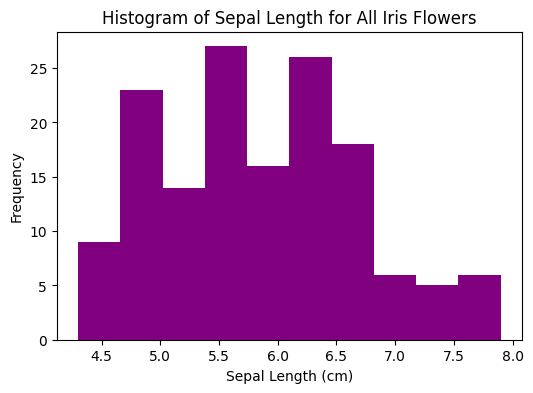

In [86]:
#ความถี่ Sepal_length ของดอกไอริสทั้งหมด
plt.figure(figsize=(6, 4))
plt.hist(sepal_length, bins=10, color='purple')
plt.title('Histogram of Sepal Length for All Iris Flowers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

In [87]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [88]:
species = ['Setosa', 'Versicolor', 'Virginica']
colors = ['lightblue', 'lightgreen', 'salmon']


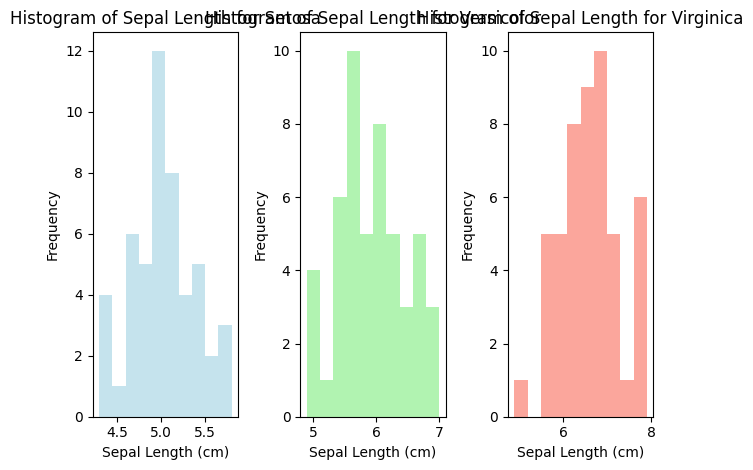

In [90]:
#ดอกไอริสแต่ละประเภท bins=10
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(sepal_length[y == i], bins=10, color=colors[i],alpha=0.7)
    plt.title(f'Histogram of Sepal Length for {species[i]}')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# เพิ่ม species และ colors
species = ['Setosa', 'Versicolor', 'Virginica', 'NewSpecies']
colors = ['lightblue', 'lightgreen', 'salmon', 'lightcoral']

# กำหนดความยาวกลีบเลี้ยง
sepal_length = X[:, 0]

# วาด histogram สำหรับแต่ละ species
for i in range(len(species)):
    plt.subplot(1, len(species), i + 1)
    plt.hist(sepal_length[y == i], bins=10, color=colors[i], alpha=0.7)
    plt.title(f'Histogram of Sepal Length for {species[i]}')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [96]:
#ส่วนที่2 แก้EPS
X = iris.data
y = iris.target
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
print(db.labels_)

[ 0  1 -1 -1  0 -1 -1  0 -1  1 -1 -1  1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1  1 -1  0  0 -1  1 -1 -1 -1  1 -1 -1  0 -1  0  0 -1 -1 -1 -1  1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [95]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import numpy as np
from scipy.spatial.distance import minkowski

def kmean(a1_list, a2_list, centroid_1, centroid_2, p=1):
    if (len(a1_list) == len(a2_list)) and (len(centroid_1) == len(centroid_2)):
        distance = np.zeros((len(a1_list), len(centroid_1)))
        new_c1 = np.zeros(len(centroid_1))
        new_c2 = np.zeros(len(centroid_2))
        cluster_no = []
        c_cnt = np.zeros(len(centroid_1))

        for i in range(len(a1_list)):
            for j in range(len(centroid_1)):
                # ใช้ Minkowski distance
                distance[i, j] = minkowski([a1_list[i], a2_list[i]], [centroid_1[j], centroid_2[j]], p)

        for i in range(len(a1_list)):
            min_val = min(distance[i, :])
            cluster_no.append(list(distance[i, :]).index(min_val))
            print("point:" + str(i + 1), "\t",
                  '{:.2f}'.format(distance[i, 0]), "\t",
                  '{:.2f}'.format(distance[i, 1]), "\t",
                  '{:.2f}'.format(distance[i, 2]), "\t",
                  cluster_no[i] + 1
                 )

        for i in range(len(a1_list)):
            new_c1[cluster_no[i]] += a1_list[i]
            new_c2[cluster_no[i]] += a2_list[i]
            c_cnt[cluster_no[i]] += 1

        for i in range(len(new_c1)):
            if c_cnt[i] != 0:  # ตรวจสอบเพื่อหลีกเลี่ยงการหารด้วยศูนย์
                new_c1[i] /= c_cnt[i]
                new_c2[i] /= c_cnt[i]

        print(new_c1, new_c2)
        return new_c1, new_c2
    else:
        print("dimension error")

# ตัวอย่างการเรียกใช้ฟังก์ชัน
a1_list = [1, 2, 3, 6, 7, 8]
a2_list = [1, 1, 1, 5, 5, 5]
centroid_1 = [1, 6]  # ค่าเริ่มต้น centroid 1
centroid_2 = [1, 5]  # ค่าเริ่มต้น centroid 2

# เรียกใช้ฟังก์ชัน kmean โดยใช้ Minkowski distance
kmean(a1_list, a2_list, centroid_1, centroid_2, p=1)  # p=1 สำหรับ Manhattan distance
